In [ ]:
# Imortant packages


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Data

data=pd.read_csv('penguins.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [10]:
# Prepeocessing

encoded_data=pd.get_dummies(data, dtype='int')

scaler = StandardScaler()
X = scaler.fit_transform(encoded_data)
DataProcessed = pd.DataFrame(data=X,columns=encoded_data.columns)
DataProcessed.head(10)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


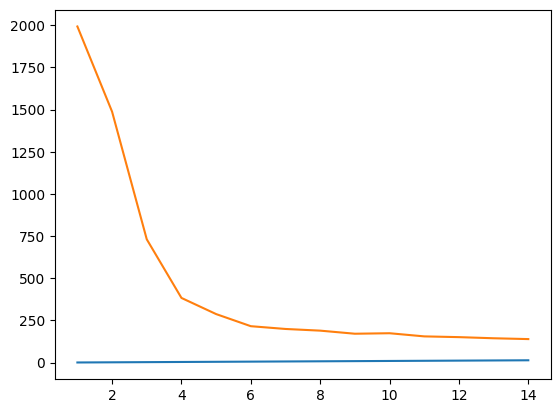

In [19]:
# Optimal K for Kmeans

inertia=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(DataProcessed)
    inertia.append((k,kmeans.inertia_))

plt.plot(range(1,15),inertia)
plt.show()


In [21]:
# kmean Model

best_k=4
model=KMeans(n_clusters=best_k,random_state=20)
model.fit(DataProcessed)
DataProcessed['labels']=model.predict(DataProcessed)
DataProcessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,labels
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994,2
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042,3
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042,3
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042,3
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994,2


In [29]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','labels','body_mass_g']
stat_penguins = DataProcessed[numeric_columns].groupby('labels').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
labels,,,,
0,0.283365,-1.489322,0.837042,0.587801
1,1.001551,-0.733134,1.467381,1.587737
2,-0.026226,1.000505,-0.443228,-0.248243
3,-0.698596,0.234097,-0.851183,-0.977856
